In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 
from sklearn import metrics

In [2]:
df = pd.read_excel("vata (1).xlsx")

In [3]:
df.iloc[:,30].unique()

array([0, 1], dtype=int64)

In [4]:
df.shape

(50000, 31)

In [5]:
# 215 247 211 70 50 19 0 188

In [6]:
X = df.drop([30], axis =1)
y = df.iloc[:,30]

In [7]:
print(X.shape)

print(y.shape)

(50000, 30)
(50000,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    # tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
                                    tf.keras.layers.Dense(40, activation=tf.keras.activations.relu),
                                    tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax)])

In [10]:
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# print('Neural Network Model Summary: ')
# print(model.summary())

In [13]:
history = model.fit(X_train, y_train, epochs=10)
# , batch_size=16, validation_data=(X_test, y_test),callbacks = [early_stop]

Epoch 1/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2051 - accuracy: 0.9117
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0477 - accuracy: 0.9969
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 4/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 4.7395e-04 - accuracy: 1.0000
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.9908e-04 - accuracy: 1.0000
Epoch 8/10
1407/1407 [==============================] - 2s 1ms/step - loss: 8.6080e-05 - accuracy: 1.0000
Epoch 9/10
1407/1407 [==============================] - 2s 1ms/step - loss: 3.8071e-05 - accuracy: 1.0000
Epoch 10/10
1407/1407 [==============================] - 2s 1ms/st

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy on test data: {accuracy * 100:.2f}%')

157/157 [==============================] - 0s 1ms/step - loss: 1.1280e-05 - accuracy: 1.0000
Model accuracy on test data: 100.00%


In [15]:
predictions = model.predict(X_test)

157/157 [==============================] - 0s 1ms/step


In [16]:
predictions.shape

(5000, 2)

In [17]:
predictions[0]

array([9.4353507e-14, 9.9999994e-01], dtype=float32)

In [18]:
pred = np.zeros(5000)

In [19]:
for i in range(5000):
    pred[i] = np.argmax(predictions[i])

In [20]:
pred

array([1., 1., 1., ..., 1., 1., 0.])

In [21]:
pred.shape

(5000,)

In [22]:
y_test.shape

(5000,)

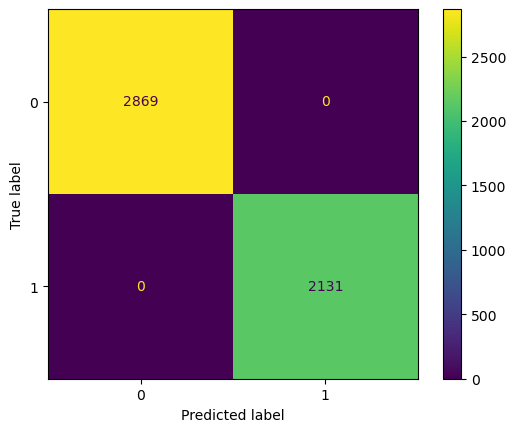

In [23]:
confusion_matrix = confusion_matrix(y_test, pred)
# print(classification_report(y_test, pred))


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [24]:
print(accuracy_score(y_test, pred))

1.0


In [25]:
model.save("vata_model.keras")